# Análise dos Microdados da Vacina do Covid-19

Importação das bibliotecas as quais serão utilizadas no desenvolvimento da análise e dos dados a serem analisados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#para pegar a os microdados das vacinas aplicadas 
microdadosVacina = pd.read_csv("vacinados.csv", sep=";", encoding='utf-8')
microdadosVacina

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


Agora realizaremos a retirada das colunas de dados que não serão necessárias para a análise em questão, a fim de facilitar a visualização do dataframe, e removeremos também os valores ausentes.

In [4]:
microdadosVacina = microdadosVacina.drop(columns=['cpf','nome','grupo','vacina','lote','data_vacinacao','sexo',])
microdadosVacina.head()

,dose,local_vacinacao
0,2.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,1.0,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,2.0,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,1.0,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,3.0,CENTRO DE VACINAÇÃO UNINASSAU


In [5]:
dt = microdadosVacina.dropna()

Realizando a separação para trabalhar apenas com as colunas de local de vacinação e de dose aplicada

In [6]:
colunasSelecionadas_LocaisVacinas = ['local_vacinacao']
colunasSelecionadas_DosesVacinas = ['dose']
colunasSelecionadas_LocaisDoses = ['dose', 'local_vacinacao']
microdadosVacina_Locais = microdadosVacina.filter(items = colunasSelecionadas_LocaisVacinas)
microdadosVacina_Doses = microdadosVacina.filter(items = colunasSelecionadas_DosesVacinas)
microdadosVacina_Locais_doses = microdadosVacina.filter(items = colunasSelecionadas_LocaisDoses)

Fazendo a contagem para ver quantos locais de vacinaçao tem e quantas doses foram aplicadas em cada local

In [7]:
microdadosVacina_Locais.value_counts().head()

local_vacinacao                            
DRIVE THRU PARQUE DA MACAXEIRA                 225295
CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA    220034
DRIVE THRU GERALDÃO                            215437
DRIVE THRU - DNOCS                             197749
DRIVE THRU DA UFPE                             177421
dtype: int64

# Análise da quantidade total de doses aplicadas

Grafico de histograma da quantidade de doses com a contagem da distribuição de quantas vacinas foram aplicadas de cada dose

dose
1.0     1519688
2.0     1312330
3.0      574350
4.0         929
dtype: int64

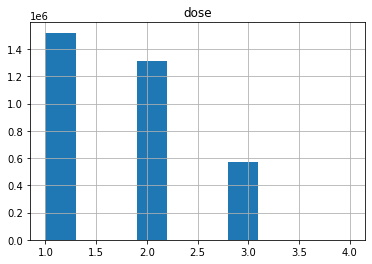

In [8]:
microdadosVacina_Doses.hist()
microdadosVacina_Doses.value_counts()

Porcentagem das doses aplicadas no total

In [9]:
distInDoses = microdadosVacina_Doses.value_counts()
percentInDoses = [100*x/distInDoses.sum() for x in distInDoses]
print(f'Porcentagem da 1ª dose:{round(percentInDoses[0], 2)}%')
print(f'Porcentagem da 2ª dose:{round(percentInDoses[1], 2)}%')
print(f'Porcentagem da 3ª dose:{round(percentInDoses[2], 2)}%')
print(f'Porcentagem da 4ª dose:{round(percentInDoses[3], 2)}%')

Porcentagem da 1ª dose:44.6%
Porcentagem da 2ª dose:38.52%
Porcentagem da 3ª dose:16.86%
Porcentagem da 4ª dose:0.03%


Com esses dados, da pra notar que reduziu o número de pessoas que tomaram as doses sucessivas da vacina, o que com isso da para imaginar que seja possível de novos surtos surgirem no futuro, pois pessoas que tomaram apenas uma certa quantidade das doses possa ser sucinta a contrair a doença mais para frente, o dado ideal seria se as porcentagens estivessem o mais parecidas possiveis para assim afirmar que a maioria da população se protegeu com todas as doses.

# Análise dos 5 locais com mais aplicações de vacinas

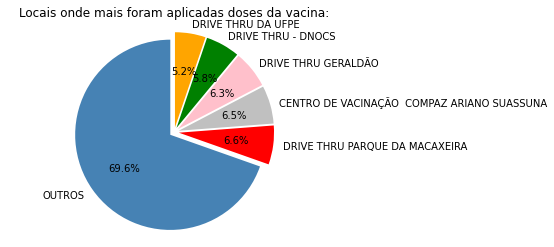

Quantidade de vacinas do local com maior numero de vacinas: 225295
Quantidade de vacinas do local com segundo maior numero de vacinas: 220034
Quantidade de vacinas do local com terceiro maior numero de vacinas: 215437
Quantidade de vacinas do local com quarto maior numero de vacinas: 197749
Quantidade de vacinas do local com quinto maior numero de vacinas: 177421
Quantidade de vacinas dos outros locais: 2371362


In [10]:
local1 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_1_local = local1.count()[0]

local2 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
qtd_2_local = local2.count()[0]

local3 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_3_local = local3.count()[0]

local4 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
qtd_4_local = local4.count()[0]

local5 = microdadosVacina.dropna().loc[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
qtd_5_local = local5.count()[0]

outros = (microdadosVacina['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')&(microdadosVacina['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU - DNOCS')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU GERALDÃO')&(microdadosVacina['local_vacinacao'] != 'DRIVE THRU DA UFPE')
qntd_outros_total = outros.sum()

labels = ['OUTROS', 'DRIVE THRU PARQUE DA MACAXEIRA', 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA','DRIVE THRU GERALDÃO', 'DRIVE THRU - DNOCS', 'DRIVE THRU DA UFPE']
values = [qntd_outros_total, qtd_1_local, qtd_2_local, qtd_3_local, qtd_4_local, qtd_5_local]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 10
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas doses da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas: {qtd_1_local}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas: {qtd_2_local}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas: {qtd_3_local}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas: {qtd_4_local}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas: {qtd_5_local}')
print(f'Quantidade de vacinas dos outros locais: {qntd_outros_total}')


A partir da visualização e análise do gráfico gerado é possível notar que apesar dos pontos de maior estrutura pra vacinar, a vacinação ocorreu de modo muito disperso pela cidade. Tal dado pode ser considerado normal, já que na cidade do recife existiram inúmeros pontos de vacinação o que demonstra um ponto positivo no combate ao covid.

# Análise dos locais onde houve mais aplicação de cada dose 

Locais com mais vacinas aplicadas contando com todas as vacinas juntas

In [11]:
microdadosVacina_Locais_doses.value_counts()

dose  local_vacinacao                                   
1.0   DRIVE THRU PARQUE DA MACAXEIRA                        103388
      CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA            98184
2.0   CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA            90415
1.0   DRIVE THRU - DNOCS                                     87076
      DRIVE THRU DA UFPE                                     85848
                                                             ...  
2.0   CENTRO DE REFERÊNCIA EAPV COVID-19 (UNIDADE MÓVEL)         1
1.0   USF COQUE BERILO PERNAMBUCANO (UNIDADE MÓVEL)              1
2.0   CENTRO DE VACINAÇÃO UFPE (UNIDADE MÓVEL)                   1
4.0   EQUIPE VOLANTE DS VII                                      1
      DRIVE THRU DA UFPE                                         1
Length: 413, dtype: int64

Vacinas aplicadas ordenada por cada lugar

In [12]:
order = dt.sort_values(by=['local_vacinacao'])
order

,dose,local_vacinacao
2529525,3.0,CENTRO DE SAÚDE BIDU KRAUSE (UNIDADE MÓVEL)
2978570,2.0,CENTRO DE SAÚDE BIDU KRAUSE (UNIDADE MÓVEL)
1284788,3.0,CENTRO DE SAÚDE BIDU KRAUSE (UNIDADE MÓVEL)
719908,3.0,CENTRO DE SAÚDE BIDU KRAUSE (UNIDADE MÓVEL)
1784979,3.0,CENTRO DE SAÚDE BIDU KRAUSE (UNIDADE MÓVEL)
...,...,...
879076,1.0,VACINAÇÃO ESCOLAR ITINERANTE
700955,2.0,VACINAÇÃO ESCOLAR ITINERANTE
700971,2.0,VACINAÇÃO ESCOLAR ITINERANTE
1121949,2.0,VACINAÇÃO ESCOLAR ITINERANTE


Separando os dados para análise por local de vacina mais dose aplicada: 1ª dose, 2ª dose, 3ª dose e 4ª dose.

In [13]:
filtered_dt_dose_1 = dt.loc[(dt['dose'] == 1)]
filtered_dt_dose_2 = dt.loc[(dt['dose'] == 2)]
filtered_dt_dose_3 = dt.loc[(dt['dose'] == 3)]
filtered_dt_dose_4 = dt.loc[(dt['dose'] == 4)]

# Análise Primeira Dose

Primeiramento pegamos os lugares que mais vacinaram a primeira dose.

In [35]:
filtered_dt_dose_1.value_counts()

dose  local_vacinacao                                   
1.0   DRIVE THRU PARQUE DA MACAXEIRA                        103388
      CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA            98184
      DRIVE THRU - DNOCS                                     87076
      DRIVE THRU DA UFPE                                     85848
      DRIVE THRU GERALDÃO                                    81712
                                                             ...  
      UBT FRANCISCO PIGNATARI (UNIDADE MÓVEL)                    3
      CENTRO DE SAÚDE ROMERO MARQUES (UNIDADE MÓVEL)             3
      USF SÍTIO DOS PINTOS (UNIDADE MÓVEL)                       2
      CENTRO DE REFERÊNCIA EAPV COVID-19 (UNIDADE MÓVEL)         1
      USF COQUE BERILO PERNAMBUCANO (UNIDADE MÓVEL)              1
Length: 138, dtype: int64

Após realizamos a contagem de todas as vacinas tirando os cinco maiores locais

In [36]:
outros_1_dose = (filtered_dt_dose_1['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')& (filtered_dt_dose_1['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')& (filtered_dt_dose_1['local_vacinacao'] != 'DRIVE THRU - DNOCS')& (filtered_dt_dose_1['local_vacinacao'] != 'DRIVE THRU DA UFPE')& (filtered_dt_dose_1['local_vacinacao'] != 'DRIVE THRU GERALDÃO')
qntd_outros_1_total = outros_1_dose.sum()

Após realizamos o gráfico para facilitação da vizualização dos dados dos locais com maiores números de vacinas aplicadas da primeria dose.

C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\4231967646.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_1_1 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\4231967646.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_1_2 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\4231967646.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_1_3 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\4231967646.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_1_4 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
C:\Users\luisf

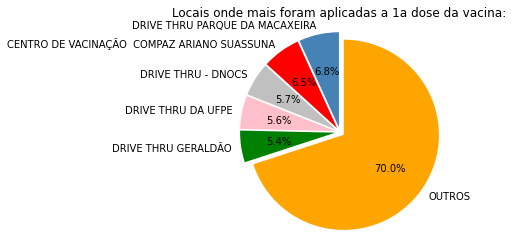

Quantidade de vacinas do local com maior numero de vacinas da primeira dose: 103388
Quantidade de vacinas do local com segundo maior numero de vacinas da primeira dose: 98184
Quantidade de vacinas do local com terceiro maior numero de vacinas da primeira dose: 87076
Quantidade de vacinas do local com quarto maior numero de vacinas da primeira dose: 85848
Quantidade de vacinas do local com quinto maior numero de vacinas da primeira dose: 81712
Quantidade de vacinas dos outros locais: 1063480


In [37]:
#GRAFICO PRIMEIRA DOSE
local_1_1 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_1maior = local_1_1.count()[0]

local_1_2 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
qtd_1seg_maior = local_1_2.count()[0]

local_1_3 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
qtd_1terc_maior = local_1_3.count()[0]

local_1_4 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
qtd_1quat_maior = local_1_4.count()[0]

local_1_5 = filtered_dt_dose_1[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_1quin_maior = local_1_5.count()[0]

qtd_1_6_local = qntd_outros_1_total

labels = ['DRIVE THRU PARQUE DA MACAXEIRA', 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA', 'DRIVE THRU - DNOCS', 'DRIVE THRU DA UFPE', 'DRIVE THRU GERALDÃO', 'OUTROS']
values = [qtd_1maior, qtd_1seg_maior, qtd_1terc_maior, qtd_1quat_maior, qtd_1quin_maior, qtd_1_6_local]


fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 10
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas a 1a dose da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas da primeira dose: {qtd_1maior}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas da primeira dose: {qtd_1seg_maior}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas da primeira dose: {qtd_1terc_maior}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas da primeira dose: {qtd_1quat_maior}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas da primeira dose: {qtd_1quin_maior}')
print(f'Quantidade de vacinas dos outros locais: {qtd_1_6_local}')


Logo após realizamos o mesmo processo para as demais doses da vacina.

# Análise Segunda Dose

In [38]:
filtered_dt_dose_2.value_counts()

dose  local_vacinacao                                   
2.0   CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA           90415
      DRIVE THRU DA UFPE                                    85168
      DRIVE THRU PARQUE DA MACAXEIRA                        82866
      DRIVE THRU GERALDÃO                                   82666
      DRIVE THRU - DNOCS                                    76782
                                                            ...  
      USF COQUE BERILO PERNAMBUCANO (UNIDADE MÓVEL)             2
      CENTRO DE VACINAÇÃO UFPE                                  1
      CENTRO DE VACINAÇÃO UFPE (UNIDADE MÓVEL)                  1
      CENTRO DE REFERÊNCIA EAPV COVID-19 (UNIDADE MÓVEL)        1
      CENTRO DE VACINAÇÃO UNIVERSO (UNIDADE MÓVEL)              1
Length: 123, dtype: int64

In [39]:
outros_2_dose = (filtered_dt_dose_2['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')& (filtered_dt_dose_2['local_vacinacao'] != 'DRIVE THRU DA UFPE')& (filtered_dt_dose_2['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')& (filtered_dt_dose_2['local_vacinacao'] != 'DRIVE THRU - DNOCS')& (filtered_dt_dose_2['local_vacinacao'] != 'DRIVE THRU GERALDÃO')
qntd_outros_2_total = outros_2_dose.sum()

C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\50136961.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_2_1 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\50136961.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_2_2 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\50136961.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_2_3 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\50136961.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_2_4 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
C:\Users\luisf\AppDat

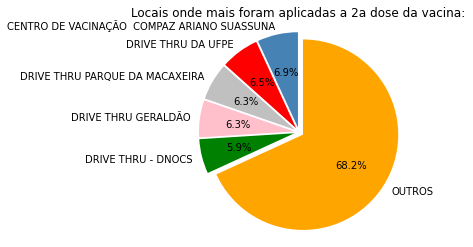

Quantidade de vacinas do local com maior numero de vacinas da segunda dose: 90415
Quantidade de vacinas do local com segundo maior numero de vacinas da segunda dose: 85168
Quantidade de vacinas do local com terceiro maior numero de vacinas da segunda dose: 82866
Quantidade de vacinas do local com quarto maior numero de vacinas da segunda dose: 82666
Quantidade de vacinas do local com quinto maior numero de vacinas da segunda dose: 76782
Quantidade de vacinas dos outros locais: 894433


In [40]:
#GRAFICO SEGUNDA DOSE
local_2_1 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
qtd_2maior = local_2_1.count()[0]

local_2_2 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU DA UFPE']
qtd_2seg_maior = local_2_2.count()[0]

local_2_3 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_2terc_maior = local_2_3.count()[0]

local_2_4 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_2quat_maior = local_2_4.count()[0]

local_2_5 = filtered_dt_dose_2[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
qtd_2quin_maior = local_2_5.count()[0]

qtd_2_6_local = qntd_outros_2_total

labels = ['CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA', 'DRIVE THRU DA UFPE', 'DRIVE THRU PARQUE DA MACAXEIRA', 'DRIVE THRU GERALDÃO', 'DRIVE THRU - DNOCS', 'OUTROS']
values = [qtd_2maior, qtd_2seg_maior, qtd_2terc_maior, qtd_2quat_maior, qtd_2quin_maior, qtd_2_6_local]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 10
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas a 2a dose da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas da segunda dose: {qtd_2maior}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas da segunda dose: {qtd_2seg_maior}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas da segunda dose: {qtd_2terc_maior}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas da segunda dose: {qtd_2quat_maior}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas da segunda dose: {qtd_2quin_maior}')
print(f'Quantidade de vacinas dos outros locais: {qtd_2_6_local}')

# Análise Terceira Dose

In [41]:
filtered_dt_dose_3.value_counts()

dose  local_vacinacao                            
3.0   SESAU - BUSCA ATIVA                            55981
      DRIVE THRU GERALDÃO                            50813
      DRIVE THRU PARQUE DA MACAXEIRA                 38881
      DRIVE THRU - DNOCS                             33890
      CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA    31433
                                                     ...  
      USF SÍTIO DOS PINTOS (UNIDADE MÓVEL)               6
      DRIVE THRU DNOCS                                   3
      CENTRO DE VACINAÇÃO COMPAZ ARIANO SUASSUNA         2
      CENTRO DE VACINAÇÃO UPINHA HÉLIO MENDONÇA          1
      DRIVE THRU - UNICAP (UNIDADE MÓVEL)                1
Length: 104, dtype: int64

In [42]:
outros_3_dose = (filtered_dt_dose_3['local_vacinacao'] != 'SESAU - BUSCA ATIVA')& (filtered_dt_dose_3['local_vacinacao'] != 'DRIVE THRU GERALDÃO')& (filtered_dt_dose_3['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')& (filtered_dt_dose_3['local_vacinacao'] != 'DRIVE THRU - DNOCS')& (filtered_dt_dose_3['local_vacinacao'] != 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA')
qntd_outros_3_total = outros_3_dose.sum()

C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\1039540344.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_3_1 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'SESAU - BUSCA ATIVA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\1039540344.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_3_2 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\1039540344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_3_3 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\1039540344.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_3_4 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
C:\Users\luisf\AppData\Local\Temp\ipy

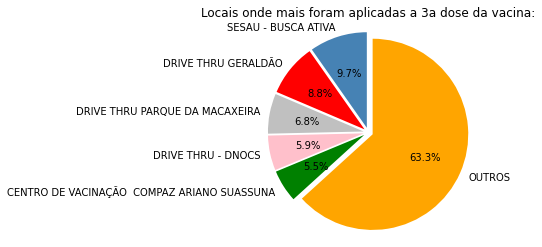

Quantidade de vacinas do local com maior numero de vacinas da terceira dose: 55981
Quantidade de vacinas do local com segundo maior numero de vacinas da terceira dose: 50813
Quantidade de vacinas do local com terceiro maior numero de vacinas da terceira dose: 38881
Quantidade de vacinas do local com quarto maior numero de vacinas da terceira dose: 33890
Quantidade de vacinas do local com quinto maior numero de vacinas da terceira dose: 31433
Quantidade de vacinas dos outros locais: 363352


In [43]:
#GRAFICO TERCCEIRA DOSE
local_3_1 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'SESAU - BUSCA ATIVA']
qtd_3maior = local_3_1.count()[0]

local_3_2 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_3seg_maior = local_3_2.count()[0]

local_3_3 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_3terc_maior = local_3_3.count()[0]

local_3_4 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'DRIVE THRU - DNOCS']
qtd_3quat_maior = local_3_4.count()[0]

local_3_5 = filtered_dt_dose_3[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA']
qtd_3quin_maior = local_3_5.count()[0]

qtd_3_6_local = qntd_outros_3_total

labels = ['SESAU - BUSCA ATIVA', 'DRIVE THRU GERALDÃO', 'DRIVE THRU PARQUE DA MACAXEIRA', 'DRIVE THRU - DNOCS', 'CENTRO DE VACINAÇÃO  COMPAZ ARIANO SUASSUNA', 'OUTROS']
values = [qtd_3maior, qtd_3seg_maior, qtd_3terc_maior, qtd_3quat_maior, qtd_3quin_maior, qtd_3_6_local]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 10
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas a 3a dose da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas da terceira dose: {qtd_3maior}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas da terceira dose: {qtd_3seg_maior}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas da terceira dose: {qtd_3terc_maior}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas da terceira dose: {qtd_3quat_maior}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas da terceira dose: {qtd_3quin_maior}')
print(f'Quantidade de vacinas dos outros locais: {qtd_3_6_local}')

# Análise Quarta Dose

In [44]:
filtered_dt_dose_4.value_counts().head()

dose  local_vacinacao               
4.0   DRIVE THRU GERALDÃO               246
      DRIVE THRU PARQUE DA MACAXEIRA    160
      CENTRO DE VACINAÇÃO GERALDÃO       79
      SESAU - BUSCA ATIVA                51
      POLICLÍNICA  ALBERT SABIN          50
dtype: int64

In [45]:
outros_4_dose = (filtered_dt_dose_4['local_vacinacao'] != 'DRIVE THRU PARQUE DA MACAXEIRA')& (filtered_dt_dose_4['local_vacinacao'] != 'POLICLÍNICA  ALBERT SABIN')& (filtered_dt_dose_4['local_vacinacao'] != 'SESAU - BUSCA ATIVA')& (filtered_dt_dose_4['local_vacinacao'] != 'DRIVE THRU GERALDÃO')& (filtered_dt_dose_4['local_vacinacao'] != 'CENTRO DE VACINAÇÃO GERALDÃO')
qntd_outros_4_total = outros_4_dose.sum()

C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\3480439579.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_4_1 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\3480439579.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_4_2 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\3480439579.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_4_3 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO GERALDÃO']
C:\Users\luisf\AppData\Local\Temp\ipykernel_14188\3480439579.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_4_4 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'SESAU - BUSCA ATIVA']
C:\Users\luisf\AppData\Loca

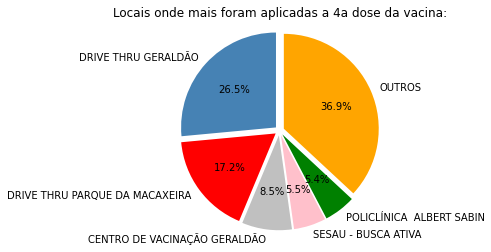

Quantidade de vacinas do local com maior numero de vacinas da quarta dose: 246
Quantidade de vacinas do local com segundo maior numero de vacinas da quarta dose: 160
Quantidade de vacinas do local com terceiro maior numero de vacinas da quarta dose: 79
Quantidade de vacinas do local com quarto maior numero de vacinas da quarta dose: 51
Quantidade de vacinas do local com quinto maior numero de vacinas da quarta dose: 50
Quantidade de vacinas dos outros locais: 343


In [46]:
#GRAFICO QUARTA DOSE
local_4_1 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'DRIVE THRU GERALDÃO']
qtd_4maior = local_4_1.count()[0]

local_4_2 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'DRIVE THRU PARQUE DA MACAXEIRA']
qtd_4seg_maior = local_4_2.count()[0]

local_4_3 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'CENTRO DE VACINAÇÃO GERALDÃO']
qtd_4terc_maior = local_4_3.count()[0]

local_4_4 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'SESAU - BUSCA ATIVA']
qtd_4quat_maior = local_4_4.count()[0]

local_4_5 = filtered_dt_dose_4[microdadosVacina['local_vacinacao'] == 'POLICLÍNICA  ALBERT SABIN']
qtd_4quin_maior = local_4_5.count()[0]

qtd_4_6_local = qntd_outros_4_total
                               

labels = ['DRIVE THRU GERALDÃO', 'DRIVE THRU PARQUE DA MACAXEIRA', 'CENTRO DE VACINAÇÃO GERALDÃO', 'SESAU - BUSCA ATIVA', 'POLICLÍNICA  ALBERT SABIN', 'OUTROS']
values = [qtd_4maior, qtd_4seg_maior, qtd_4terc_maior, qtd_4quat_maior, qtd_4quin_maior, qtd_4_6_local]

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 10
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'red', 'silver', 'pink', 'green', 'orange'], explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Locais onde mais foram aplicadas a 4a dose da vacina:')
ax1.axis('equal')
plt.show()

print(f'Quantidade de vacinas do local com maior numero de vacinas da quarta dose: {qtd_4maior}')
print(f'Quantidade de vacinas do local com segundo maior numero de vacinas da quarta dose: {qtd_4seg_maior}')
print(f'Quantidade de vacinas do local com terceiro maior numero de vacinas da quarta dose: {qtd_4terc_maior}')
print(f'Quantidade de vacinas do local com quarto maior numero de vacinas da quarta dose: {qtd_4quat_maior}')
print(f'Quantidade de vacinas do local com quinto maior numero de vacinas da quarta dose: {qtd_4quin_maior}')
print(f'Quantidade de vacinas dos outros locais: {qtd_4_6_local}')

Com isso temos uma análise dos lugares que mais vacinaram em cada dose.